In [1]:
from web3 import Web3
import numpy as np
import matplotlib.pyplot as plt
import math
import time

In [2]:
#constants
start=8961400-5*(57-1)
finish=8961400-5*(57-2)
print('First block:',start)
print('Last block:',finish)
eth_reward=2#reward for one block in eth
to_eth=10**(-18)#wei to eth
absolute=[]
relative=[]
contracts=[]
blocks=[]
#рассчет комиссии за блок и количество смарт-контрактов
def block_fee(block_):
    smart=0
    gas_fee=0
    for i in block_.transactions:
        gas_price=i.gasPrice
        gas_used=web3.eth.getTransactionReceipt(i.hash).gasUsed
        time.sleep(1)
        gas_fee+=gas_price*gas_used
        if i.input !='0x':
            smart+=1
    return gas_fee*to_eth, smart

First block: 8961120
Last block: 8961125


In [3]:
web3 = Web3(Web3.HTTPProvider("https://mainnet.infura.io/f1a0399bd4ce4ad198d6209a00f079e8"))

In [4]:
for number in range(start, finish+1):
    block=web3.eth.getBlock(number, True)
    total_fee, smart_c = block_fee(block)
    block_reward=eth_reward+total_fee
    absolute.append(total_fee)
    relative.append(total_fee*100/block_reward)
    contracts.append(smart_c)
    blocks.append(block.number)
# Подсчёт статистических данных
M = np.mean(absolute)
med = np.median(absolute)
data_range = np.max(absolute) - np.min(absolute)
D = np.var(absolute)
S = math.sqrt(D)
contr = np.sum(contracts)

print('Мат.ожидание:',M)
print('медиана:',med)
print('Разброс:',data_range)
print('Дисперсия:',D)
print('Среднеквадратическое отклонение:',S)
print('Количество смарт-контрактов:',contr)

Мат.ожидание: 0.13410567313883662
медиана: 0.11969045975459118
Разброс: 0.13744144929597585
Дисперсия: 0.002501618085969322
Среднеквадратическое отклонение: 0.05001617824233797
Количество смарт-контрактов: 799


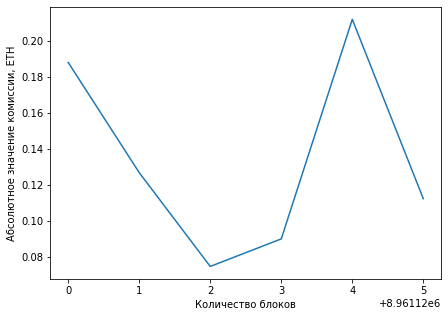

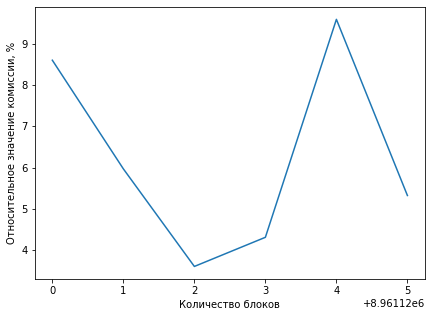

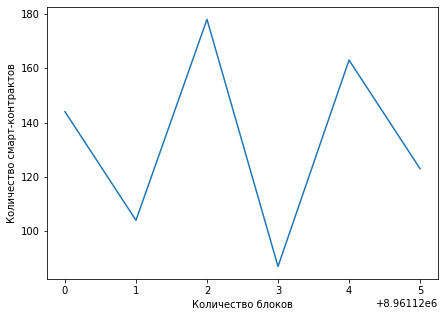

In [7]:
# Построение графиков
plt.figure(figsize=(7,5))
plt.plot(blocks, absolute)
plt.xlabel('Количество блоков')
plt.ylabel('Абсолютное значение комиссии, ETH')
plt.show()

plt.figure(figsize=(7,5))
plt.plot(blocks, relative)
plt.xlabel('Количество блоков')
plt.ylabel('Относительное значение комиссии, %')
plt.show()

plt.figure(figsize=(7,5))
plt.plot(blocks, contracts)
plt.xlabel('Количество блоков')
plt.ylabel('Количество смарт-контрактов')
plt.show()